# Supermarket Sales Data Analysis: January 2019 - March 2019

## Setting-Up the Environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Initial Data Exploration

In [5]:
df = pd.read_csv('supermarket_sales.csv')

In [6]:
df.head()

,invoice_id,branch,city,customer,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.tail()

,invoice_id,branch,city,customer,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_id    1003 non-null   object 
 1   branch        1003 non-null   object 
 2   city          1003 non-null   object 
 3   customer      924 non-null    object 
 4   gender        1003 non-null   object 
 5   product_line  960 non-null    object 
 6   unit_price    996 non-null    float64
 7   quantity      983 non-null    float64
 8   tax           1003 non-null   float64
 9   total         1003 non-null   float64
 10  date          1003 non-null   object 
 11  time          1003 non-null   object 
 12  payment       1003 non-null   object 
 13  cogs          1003 non-null   float64
 14  gross_margin  1003 non-null   float64
 15  gross_income  1003 non-null   float64
 16  rating        1003 non-null   float64
dtypes: float64(8), object(9)
memory usage: 133.3+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/var/folders/x9/8yncv2h56z39xy5j_7yfz6cr0000gn/T/ipykernel_14524/2370506791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [10]:
#summary statistics for every numeric (float) columns
df.describe() 

,unit_price,quantity,tax,total,date,cogs,gross_margin,gross_income,rating
count,996.000000,983.000000,1003.000000,1003.000000,1003,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,2019-02-14 00:18:39.840478464,308.007358,4.761905e+00,15.400368,6.972682
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,2019-01-24 00:00:00,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,2019-02-13 00:00:00,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,2019-03-08 00:00:00,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.000000,4.761905e+00,49.650000,10.000000
std,26.510165,2.924673,11.715192,246.019028,NaN,234.303836,6.131488e-14,11.715192,1.717647


## Data Cleaning and Preparation

### Exploring Duplicated & Missing Data

In [13]:
df.duplicated().sum()

3

In [14]:
df[df.duplicated()==True]

,invoice_id,branch,city,customer,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin,gross_income,rating
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,2019-03-10,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,2019-01-26,15:17,Cash,609.56,4.761905,30.478,5.5


In [15]:
df.isnull().sum()

invoice_id       0
branch           0
city             0
customer        79
gender           0
product_line    43
unit_price       7
quantity        20
tax              0
total            0
date             0
time             0
payment          0
cogs             0
gross_margin     0
gross_income     0
rating           0
dtype: int64

In [16]:
df.isna().sum()/len(df)

invoice_id      0.000000
branch          0.000000
city            0.000000
customer        0.078764
gender          0.000000
product_line    0.042871
unit_price      0.006979
quantity        0.019940
tax             0.000000
total           0.000000
date            0.000000
time            0.000000
payment         0.000000
cogs            0.000000
gross_margin    0.000000
gross_income    0.000000
rating          0.000000
dtype: float64

<Axes: >

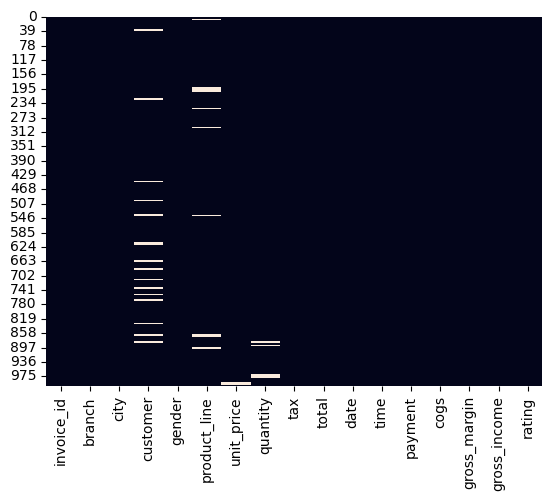

In [17]:
sns.heatmap(df.isnull(),cbar=False)

We can see here that we got 2 types of data in the missing data. Categorical (customer & product_line) and Numerical (unit_price & quantity). We would have to use two different ways to fill those up. We will use mean() to fill up the numerical data and then use mode() to fill up the categorical data.

### Dealing with Duplicated & Missing Data

In [20]:
#Dropping duplicated data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [21]:
print(df.shape)

(1000, 17)


#### Handling Categorical Missing Data (customer and product_line):

In [23]:
df.mode().iloc[0]

invoice_id              101-17-6199
branch                            A
city                         Yangon
customer                     Normal
gender                       Female
product_line    Fashion accessories
unit_price                    83.77
quantity                       10.0
tax                           4.154
total                        87.234
date            2019-02-07 00:00:00
time                          14:42
payment                     Ewallet
cogs                          83.08
gross_margin               4.761905
gross_income                  4.154
rating                          6.0
Name: 0, dtype: object

In [24]:
df['customer'] = df['customer'].fillna(df['customer'].mode()[0])
df['product_line'] = df['product_line'].fillna(df['product_line'].mode()[0])

#### Handling Numerical Missing Data (unit_price and quantity):

In [64]:
columns_of_interest = ['unit_price', 'quantity']
mean_values = df[columns_of_interest].mean()
print(mean_values)

unit_price    55.700292
quantity       5.503568
dtype: float64


In [26]:
df['unit_price'] = df['unit_price'].fillna(df['unit_price'].mean())
df['quantity'] = df['quantity'].fillna(df['quantity'].mean())

#### Validating that the Missing Values are all Dealt with

<Axes: >

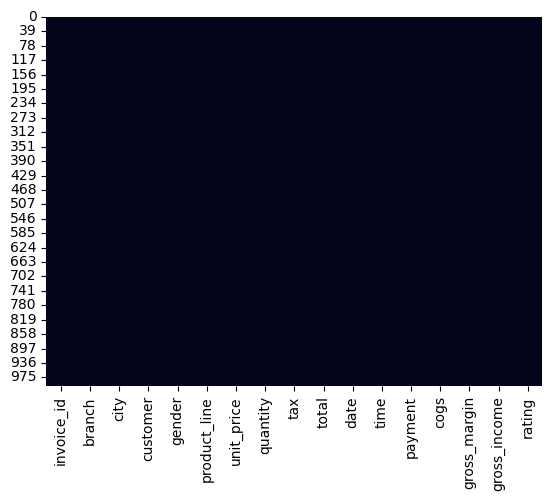

In [28]:
sns.heatmap(df.isnull(),cbar=False)

## Data Transformation
I will be adding three extra columns:
- total_price (excluding 5% tax from total)
- day (day of the week the transaction occur)
- time_period (Morning, Afternoon, Evening)

In [30]:
df['total_price'] = df['total'] - df['tax']

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()

In [32]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce').dt.time

def classify_time(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_period'] = pd.to_datetime(df['time'].astype(str)).dt.hour.apply(classify_time)

/var/folders/x9/8yncv2h56z39xy5j_7yfz6cr0000gn/T/ipykernel_14524/3509555616.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_period'] = pd.to_datetime(df['time'].astype(str)).dt.hour.apply(classify_time)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_id    1000 non-null   object        
 1   branch        1000 non-null   object        
 2   city          1000 non-null   object        
 3   customer      1000 non-null   object        
 4   gender        1000 non-null   object        
 5   product_line  1000 non-null   object        
 6   unit_price    1000 non-null   float64       
 7   quantity      1000 non-null   float64       
 8   tax           1000 non-null   float64       
 9   total         1000 non-null   float64       
 10  date          1000 non-null   datetime64[ns]
 11  time          1000 non-null   object        
 12  payment       1000 non-null   object        
 13  cogs          1000 non-null   float64       
 14  gross_margin  1000 non-null   float64       
 15  gross_income  1000 non-null   float64       

## Saving Cleaned Data

In [35]:
df.to_csv('cleaned_supermarket_sales.csv', index=False)
print("cleaned dataset saved.")

cleaned dataset saved.
